In [64]:
import pandas as pd
data = pd.read_csv("D:\intership\cognoriseinfotech\TASK 7 SHOPPER SENTIMENTS\\TeePublic_review.csv", encoding='latin1')
data.head()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4


In [4]:
data.isna().sum()

reviewer_id           1
store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                12
review            30503
review-label          0
dtype: int64

In [14]:
data['title'].fillna("No Title", inplace=True)
data['title'].isna().sum()

0

In [15]:
data['review'].fillna("No Review", inplace=True)
data['review'].isna().sum()

0

In [16]:
data['reviewer_id'].fillna("0", inplace=True)
data['reviewer_id'].isna().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15732\1642739307.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data['reviewer_id'].fillna("0", inplace=True)


0

In [17]:
data.isna().sum()

reviewer_id       0
store_location    0
latitude          0
longitude         0
date              0
month             0
year              0
title             0
review            0
review-label      0
dtype: int64

In [27]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
  
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['cleaned_review'] = data['review'].apply(preprocess_text)

# Display the first few rows of the cleaned reviews
data[['review', 'cleaned_review']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,cleaned_review
0,I had an order that was lost in transit. When ...,order lost transit called help customer servic...
1,I ordered the wrong size tee and had difficult...,ordered wrong size tee difficulty returning we...
2,These guys offer the best customer service in ...,guy offer best customer service retail product...
3,Looked for an obscure phrase on a shirt. Teepu...,looked obscure phrase shirt teepublic process ...
4,My order arrived in a good timely fashion & th...,order arrived good timely fashion item receive...


In [26]:
pip install  geopandas

     ---------------------------------------- 0.0/51.5 kB ? eta -:--:--
     --------------- ---------------------- 20.5/51.5 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 51.5/51.5 kB 529.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ------- -------------------------------- 0.2/1.1 MB 5.9 MB/s eta 0:00:01
   ------------- -------------------------- 0.4/1.1 MB 5.8 MB/s eta 0:00:01
   ---------------------------------- ----- 1.0/1.1 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 7.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
   - -------------------------------------- 0.7/22.9 MB 21.5 MB/s eta 0:00:02
   - -------------------------------------- 1.1/22.9 MB 13.8 MB/s eta 0:00:02
   -- ------------------------------------- 1.6/22.9 MB 12.6 MB/s eta 0:00:02
   --- ------------------------------------ 1.9/22.9 MB 10.0 MB/s eta 0:00:03
   ---- -----

In [28]:
import geopandas as gpd

# Convert the dataframe to a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

gdf.head()


,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label,cleaned_review,geometry
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5,order lost transit called help customer servic...,POINT (-95.71289 37.09024)
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5,ordered wrong size tee difficulty returning we...,POINT (-95.71289 37.09024)
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5,guy offer best customer service retail product...,POINT (-95.71289 37.09024)
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5,looked obscure phrase shirt teepublic process ...,POINT (-95.71289 37.09024)
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4,order arrived good timely fashion item receive...,POINT (-106.34677 56.13037)


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_matrix = vectorizer.fit_transform(data['cleaned_review'])
print(tfidf_matrix)
# Display the shape of the TF-IDF matrix
print(tfidf_matrix.shape)


  (0, 68550)	0.10822834414008975
  (0, 100003)	0.15698893199336114
  (0, 100132)	0.7068607939800713
  (0, 44734)	0.1284136153022964
  (0, 9359)	0.16115268143071207
  (0, 71162)	0.13046834684243114
  (0, 62069)	0.16923917230957372
  (0, 54726)	0.2643863618010808
  (0, 36445)	0.10915477858954839
  (0, 70009)	0.2211741851869513
  (0, 74024)	0.09025129024357859
  (0, 20937)	0.09964953878975828
  (0, 39311)	0.17150800346374082
  (0, 14180)	0.21823511239924742
  (0, 88693)	0.2285302317873252
  (0, 48763)	0.17546140807131583
  (0, 57842)	0.25884782427467457
  (1, 28964)	0.15075279975790737
  (1, 63167)	0.3476347779716208
  (1, 39782)	0.18731408618279524
  (1, 75437)	0.07468179658961509
  (1, 73842)	0.16476012122894193
  (1, 43650)	0.16812866412220415
  (1, 70296)	0.24238828546980723
  (1, 41792)	0.20517287495753816
  :	:
  (278098, 36088)	0.19259558784674996
  (278098, 71162)	0.28144817117136917
  (278099, 57659)	0.30384514626962644
  (278099, 85438)	0.28744585561288105
  (278099, 72765)	0.25

In [40]:
l=['date','month', 'year', 'title']
data[l]

,date,month,year,title
0,2023,6,2015 00:00:00,Great help with lost order
1,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½
2,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½
3,2023,6,2024 00:00:00,Good Stuff
4,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½
...,...,...,...,...
278095,2018,4,2027 00:00:00,Highly recommend!
278096,2018,4,2027 00:00:00,Great quality
278097,2018,4,2027 00:00:00,Dudes rock.
278098,2018,4,2027 00:00:00,Shipping was fast the T-shirt was justï¿½ï¿½ï¿½


In [39]:
data.columns

Index(['reviewer_id', 'store_location', 'latitude', 'longitude', 'date',
       'month', 'year', 'title', 'review', 'review-label', 'cleaned_review'],
      dtype='object')

In [46]:
data['day_of_week'] = data['date'].dt.dayofweek
data['quarter'] = data['date'].dt.quarter

# Display the first few rows with the new features
print(data[['date', 'day_of_week', 'quarter']].head())


        date  day_of_week  quarter
0 2023-01-01            6        1
1 2023-01-01            6        1
2 2023-01-01            6        1
3 2023-01-01            6        1
4 2023-01-01            6        1


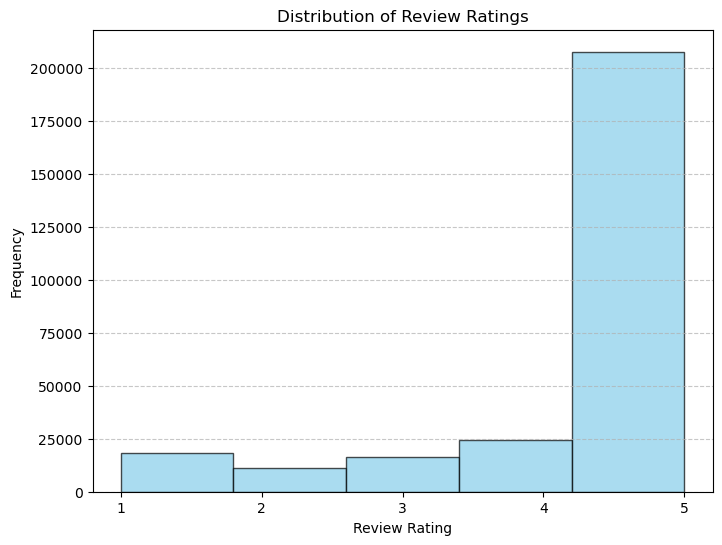

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(data['review-label'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Review Ratings')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

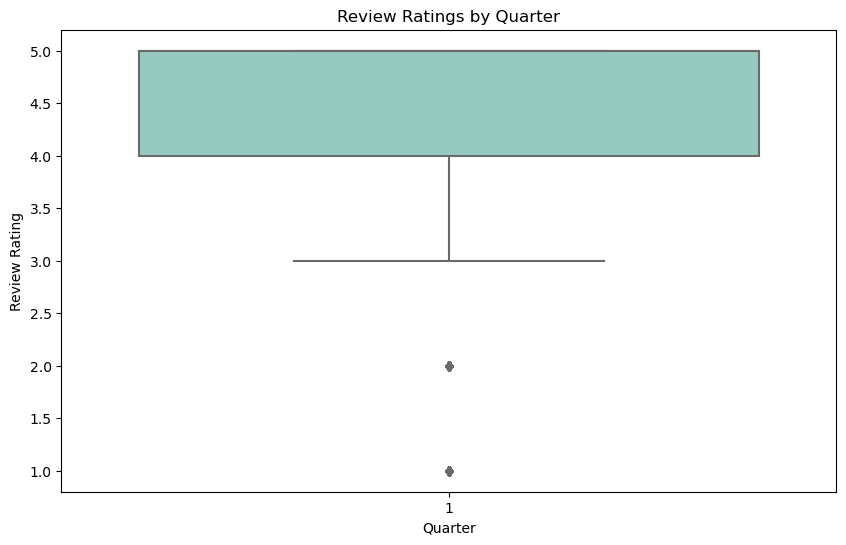

In [50]:
import seaborn as sns




plt.figure(figsize=(10, 6))
sns.boxplot(x='quarter', y='review-label', data=data, palette='Set3')
plt.xlabel('Quarter')
plt.ylabel('Review Rating')
plt.title('Review Ratings by Quarter')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15732\3223844924.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


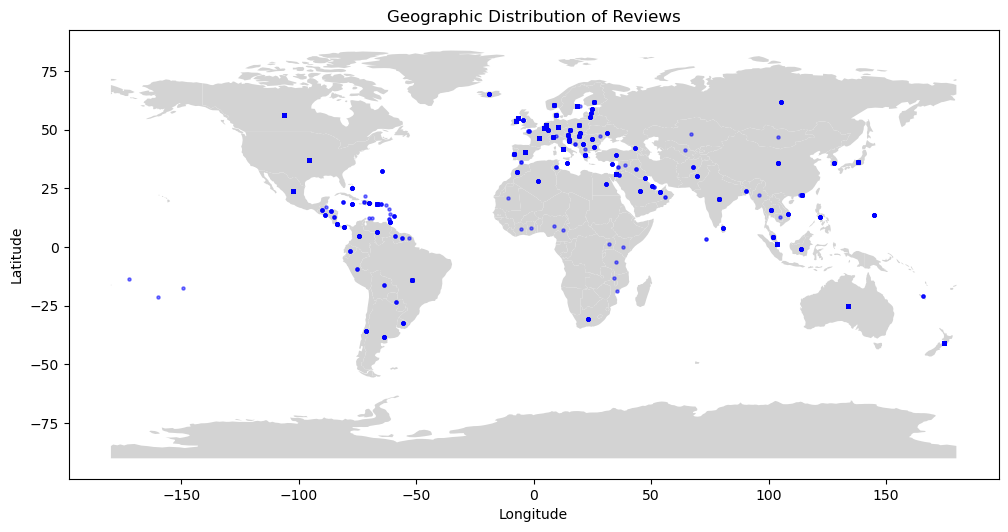

In [52]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point


gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgrey')

gdf.plot(ax=ax, markersize=5, color='blue', alpha=0.5)

plt.title('Geographic Distribution of Reviews')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
